# BS: Analysis of Rotating Coil Measurements

## Import packages and default parameters

In [92]:
import lnls.rotating_coil as rc
import lnls.utils as ut
import imp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import imp as reload_tool
reload_tool.reload(rc);
# f  = plt.figure(figsize=(8,40))
# gs = gridspec.GridSpec(7, 1)
# gs.update(left=0.2,top=0.98,bottom=0.02,right=0.95,hspace=0.22,wspace=0.05)
# ax1 = plt.subplot(gs[0,0])

%matplotlib notebook

# --- load default analysis parameters ---
parms = rc.BSAnalysisParameters()
print(parms.label); print('='*len(parms.label)); print(parms)

Parameters for booster sextupoles
label                          Parameters for booster sextupoles
main_harmonic                  3 (sextupole)
main_harmonic_is_skew          False
reference_radius[mm]           17.500000
harmonics                      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


## Load files and calculate multipoles

In [93]:
# --- loads and performs analysis of data files ---

import imp as reload_tool
reload_tool.reload(rc);
reload_tool.reload(ut);

print('--- measurements M1')
fnames = ut.files_get_matches('../../../../measurement/magnetic/rotcoil/newdata-bs-015/2017-01-24/coils-main/M1', strs_in=('.dat','BG_'))
m1 = rc.run_analysis(parms, fnames); 

meas_data_set = [m1, ]

--- measurements M1
00 - 2017-01-24_08-10-37_S15-001_001_BG_Imc=+0000A.dat, current:   +0.0311 +/- 0.0003
01 - 2017-01-24_08-11-25_S15-001_001_BG_Imc=+0002A.dat, current:   +2.0026 +/- 0.0004
02 - 2017-01-24_08-12-14_S15-001_001_BG_Imc=+0004A.dat, current:   +4.0026 +/- 0.0003
03 - 2017-01-24_08-13-02_S15-001_001_BG_Imc=+0006A.dat, current:   +5.9997 +/- 0.0002
04 - 2017-01-24_08-13-51_S15-001_001_BG_Imc=+0008A.dat, current:   +7.9980 +/- 0.0003
05 - 2017-01-24_08-14-39_S15-001_001_BG_Imc=+0010A.dat, current:   +9.9966 +/- 0.0003
06 - 2017-01-24_08-15-30_S15-001_001_BG_Imc=+0030A.dat, current:  +29.9983 +/- 0.0005
07 - 2017-01-24_08-16-20_S15-001_001_BG_Imc=+0050A.dat, current:  +49.9984 +/- 0.0013
08 - 2017-01-24_08-17-11_S15-001_001_BG_Imc=+0070A.dat, current:  +69.9992 +/- 0.0005
09 - 2017-01-24_08-18-02_S15-001_001_BG_Imc=+0090A.dat, current:  +90.0049 +/- 0.0007
10 - 2017-01-24_08-18-53_S15-001_001_BG_Imc=+0110A.dat, current: +110.0034 +/- 0.0005
11 - 2017-01-24_08-19-43_S15-001_0

## Remanent field

In [94]:
# calculates remanent field for data points with excitation currents below a certain threshold
# it is assumed that data is taken afetr demagnetization procudure.

(polya_avg,polya_std),(polyb_avg,polyb_std) = rc.get_remanent_field([meas_data_set,], current_threshold=0.5)
print('                 normal                   |  skew')
print('                ----------------------------------------------------')
print('dipole [T.m]   : {2:+.3e} +/- {3:.3e} | {0:+.3e} +/- {1:.3e} '.format(polya_avg[0], polya_std[0], polyb_avg[0], polyb_std[0]))
print('quadrupole [T] : {2:+.3e} +/- {3:.3e} | {0:+.3e} +/- {1:.3e} '.format(polya_avg[1], polya_std[1], polyb_avg[1], polyb_std[1]))
print('sextupole [T/m]: {2:+.3e} +/- {3:.3e} | {0:+.3e} +/- {1:.3e} '.format(polya_avg[2], polya_std[2], polyb_avg[2], polyb_std[2]))
print('')

                 normal                   |  skew
                ----------------------------------------------------
dipole [T.m]   : +8.355e-06 +/- 9.021e-07 | +3.017e-06 +/- 1.413e-07 
quadrupole [T] : +6.533e-06 +/- 6.057e-05 | -1.029e-04 +/- 9.517e-06 
sextupole [T/m]: -2.658e+00 +/- 5.300e-02 | -6.223e-04 +/- 3.714e-05 



## Maximum strengths from measurements

In [95]:
ML = parms.max_integ_mult_spec # [T]

print('{0:<35s}: {1:+.3f} [T]'.format('max integrated sextupole (spec)', ML))
d, max_current = rc.get_maximum_main_multipole(m1,parms,0.5); 
print('medida 01 - {0:<30s}: {1:+.4f} [T] ({2:+.1f} %) @ {3:.3f} A'.format('max. integ. sext. (data)', d, 100*(d-ML)/ML, max_current))

max integrated quadrupole (spec)   : -21.015 [T]
medida 01 - max. integ. quad. (data)      : -362.0737 [T] (+1623.0 %) @ 165.037 A


In [88]:
print(m1[0])



--- measurement ---

data_filename                  2017-01-24_08-10-37_S15-001_001_BG_Imc=+0000A.dat
time_stamp                     24/01/2017 08:10:37
main_coil_current_avg[A]       +0.031
main_coil_current_std[A]       0.000
temperature                    23.0
nr_turns                       10

--- rotating coil ---

label                          Anel_Bobina_Radial_18-01-2017
type                           Radial Coil
rotation_direction             Clockwise
rotation_velocity[rps]         1.000000
rotation_acceleration[rps^2]   0.500000
inner_radius[m]                0.000000
outer_radius[m]                0.012960
integrator_gain                100.000000
nr_coil_turns                  9
measurement_type               N_Bucked
init_tick                      329674
nr_points_integrator           144
label                          Parameters for booster sextupoles
main_harmonic                  3 (sextupole)
main_harmonic_is_skew          False
reference_radius[mm]           17.50

## Current Values at 150 MeV and 3 GeV

In [112]:
sx_len = 0.105
sd_S   = 5.007982970980575
sf_S   = 11.331918124055948

reload_tool.reload(rc);
reload_tool.reload(ut);

energy  = 3e9
I_3gev_sf_avg, I_3gev_sf_std = rc.find_current(meas_data_set, parms, multi_norm=sf_S*sx_len, energy=energy, mtype='normal', current_threshold=0.0)
I_3gev_sd_avg, I_3gev_sd_std = rc.find_current(meas_data_set, parms, multi_norm=sd_S*sx_len, energy=energy, mtype='normal', current_threshold=0.0)
energy  = 150e6
I_150mev_sf_avg, I_150mev_sf_std = rc.find_current(meas_data_set, parms, multi_norm=sf_S*sx_len, energy=energy, mtype='normal', current_threshold=0.0)
I_150mev_sd_avg, I_150mev_sd_std = rc.find_current(meas_data_set, parms, multi_norm=sd_S*sx_len, energy=energy, mtype='normal', current_threshold=0.0)

print('{0:<4s} current [A] @ 150 Mev: {1:7.3f} +/- {2:.4f}'.format('SF',I_150mev_sf_avg,I_150mev_sf_std))
print('{0:<4s} current [A] @   3 GeV: {1:7.3f} +/- {2:.4f}'.format('SF',I_3gev_sf_avg,I_3gev_sf_std))
print('{0:<4s} current [A] @ 150 Mev: {1:7.3f} +/- {2:.4f}'.format('SD',I_150mev_sd_avg,I_150mev_sd_std))
print('{0:<4s} current [A] @   3 GeV: {1:7.3f} +/- {2:.4f}'.format('SD',I_3gev_sd_avg,I_3gev_sd_std))


SF   current [A] @ 150 Mev:     nan +/- nan
SF   current [A] @   3 GeV:   4.463 +/- 0.0000
SD   current [A] @ 150 Mev:     nan +/- nan
SD   current [A] @   3 GeV:   1.310 +/- 0.0000


## Excitation Curve

<IPython.core.display.Javascript object>


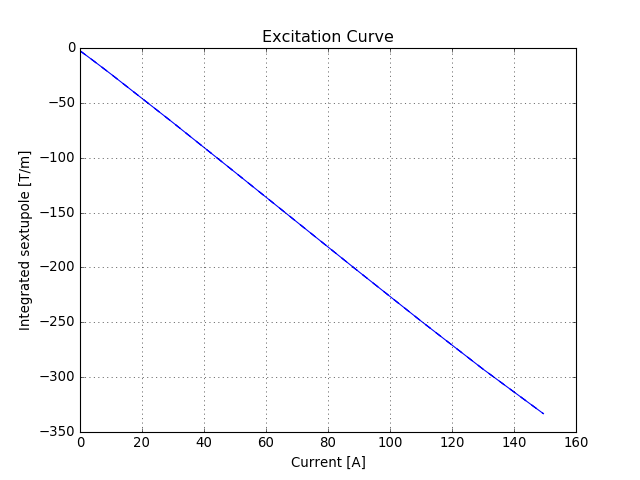

In [108]:
reload_tool.reload(rc);
reload_tool.reload(ut);


currents = [0.1,2,4,6,8,10,20,30,40,50,60,70,80,90,100,110,120,130,140,149.5]

excitation_curve, std = rc.get_average_excitation_curve(meas_data_set, parms, currents)
rc.plot_excitation_curve(meas_data_set, parms, currents, show=True, save=False)
#fit_error, currents, multipoles_avg = rc.calc_excitation_curve_nonlinearity(all_data[0], parms, currents)

## Histeresis

<IPython.core.display.Javascript object>


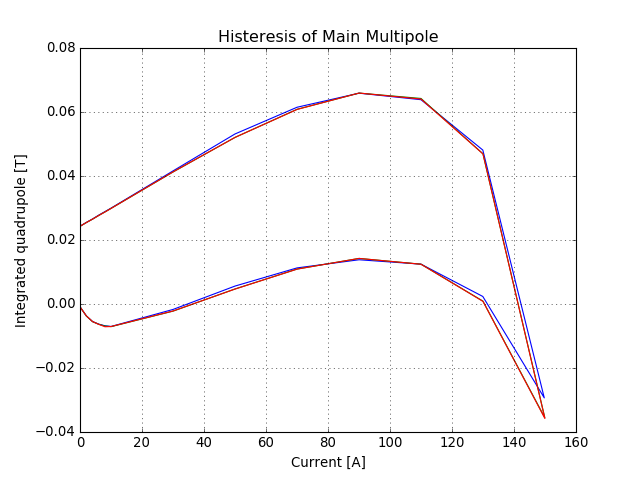

In [41]:
import imp as reload_tool
reload_tool.reload(rc);

currents = [0.1,2,4,6,8,10,20,30,40,50,60,70,80,90,100,110,120,130,140,149.5]

rc.plot_hysteresis(meas_data_set, parms, excitation_curve)

## Normal Relative multipoles (saved to PNG files)

<IPython.core.display.Javascript object>


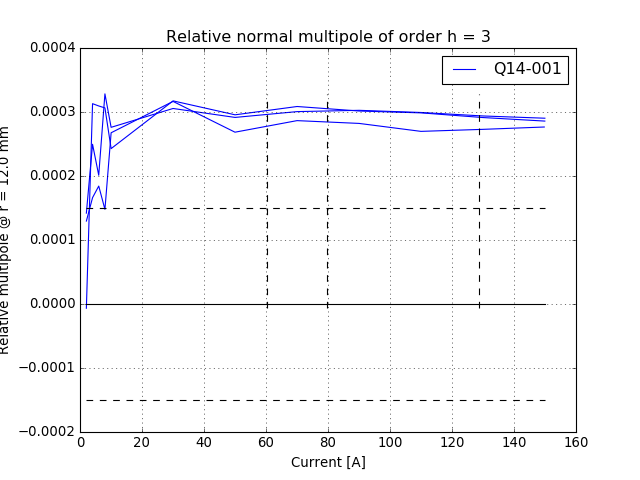

<IPython.core.display.Javascript object>


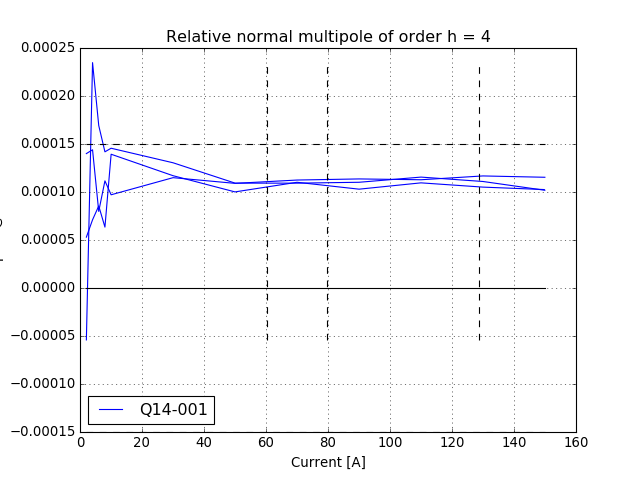

<IPython.core.display.Javascript object>


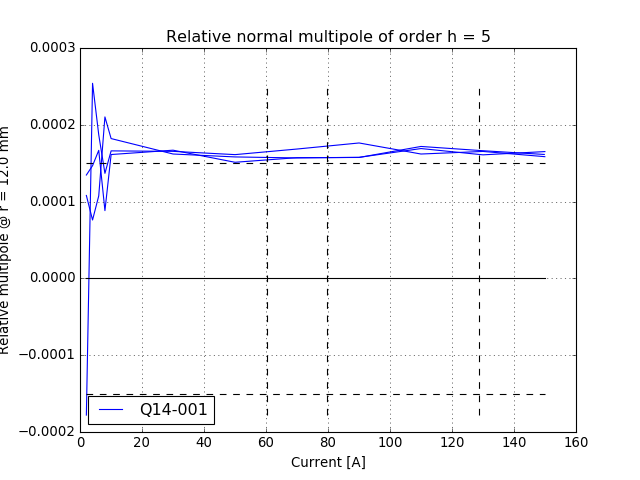

<IPython.core.display.Javascript object>


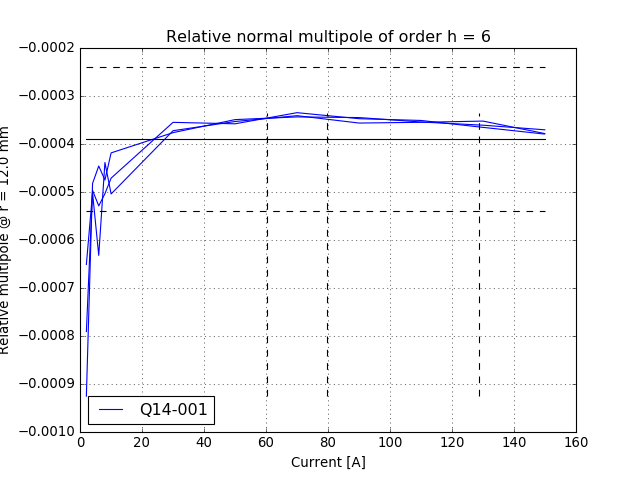

<IPython.core.display.Javascript object>


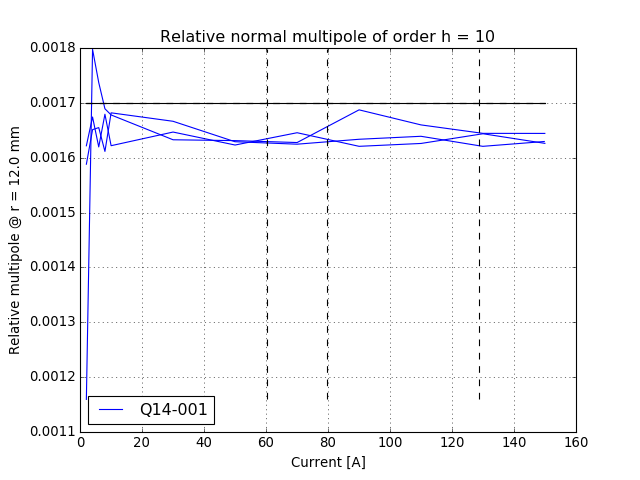

<IPython.core.display.Javascript object>


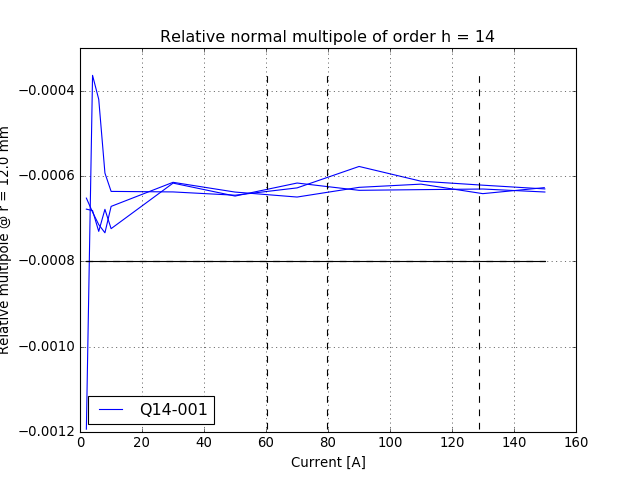

<IPython.core.display.Javascript object>


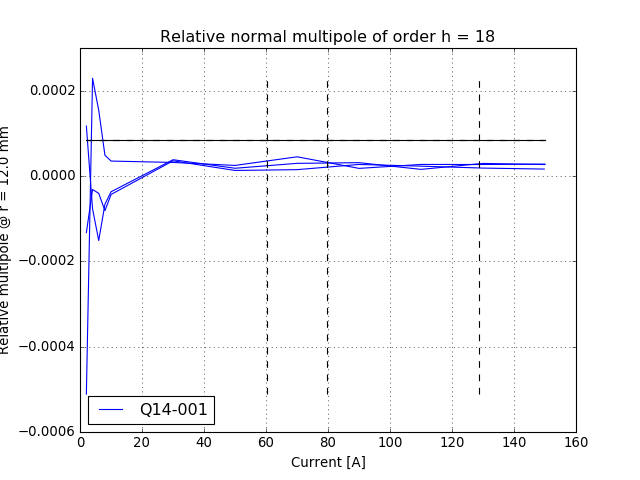

In [42]:
currents = [I_3gev_qda_avg,I_3gev_qdb1_avg,I_3gev_qdb2_avg]
args = {'mtype':'normal','current_threshold':0.5,'currents':currents,'show':True,'save':False}

rc.plot_relative_multipoles(all_data, parms, 3, **args)
rc.plot_relative_multipoles(all_data, parms, 4, **args)
rc.plot_relative_multipoles(all_data, parms, 5, **args)
rc.plot_relative_multipoles(all_data, parms, 6, **args)
rc.plot_relative_multipoles(all_data, parms, 10,**args)
rc.plot_relative_multipoles(all_data, parms, 14,**args)
rc.plot_relative_multipoles(all_data, parms, 18,**args)

## Skew Relative multipoles (saved to PNG files)

/usr/local/lib/python3.4/dist-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


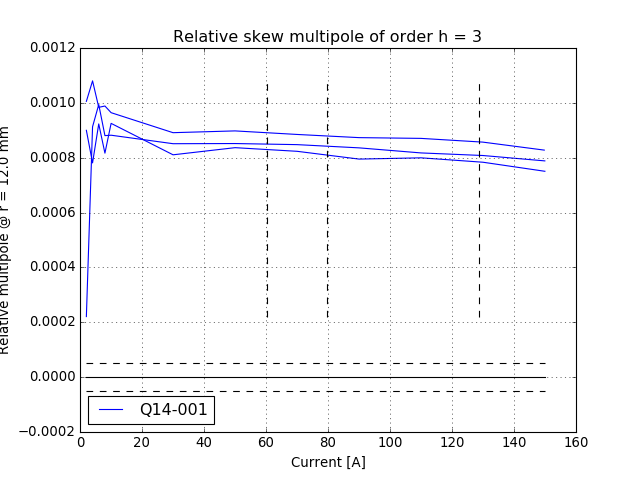

<IPython.core.display.Javascript object>


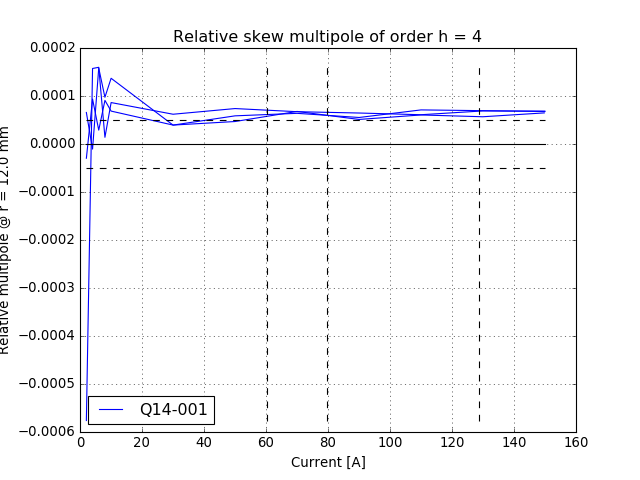

<IPython.core.display.Javascript object>


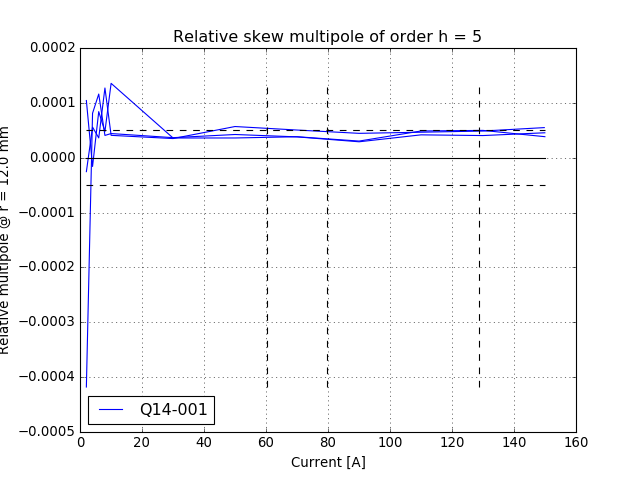

<IPython.core.display.Javascript object>


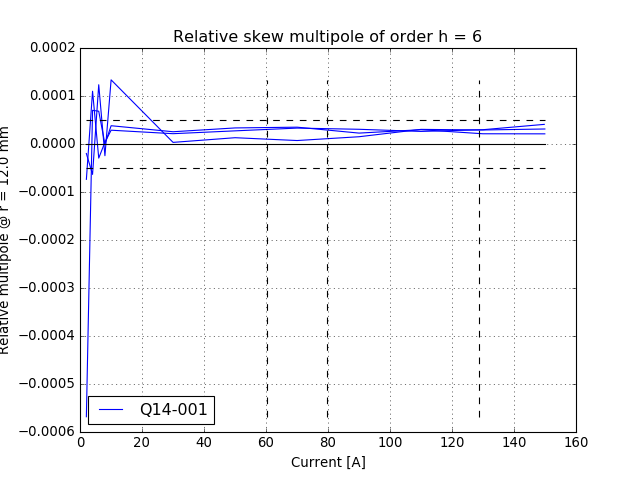

<IPython.core.display.Javascript object>


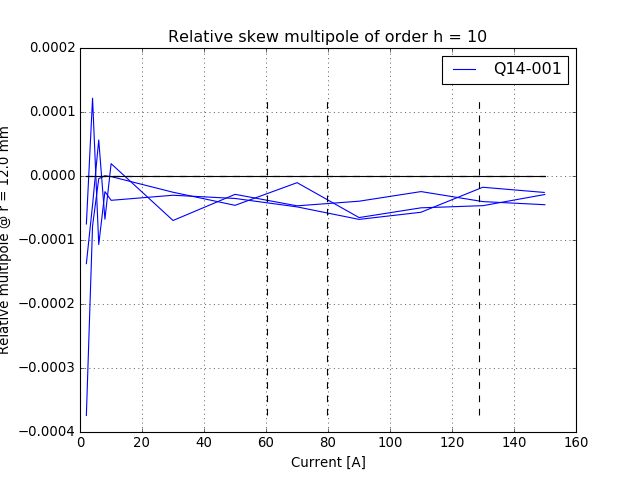

<IPython.core.display.Javascript object>


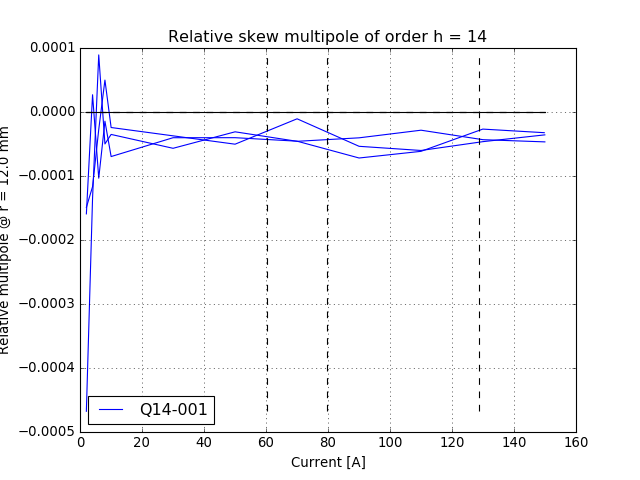

<IPython.core.display.Javascript object>


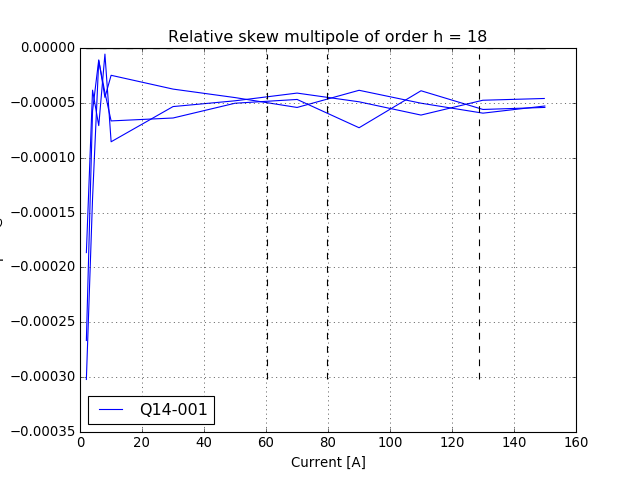

In [46]:
currents = [I_3gev_qda_avg,I_3gev_qdb1_avg,I_3gev_qdb2_avg]
args = {'mtype':'skew','current_threshold':0.5,'currents':currents,'show':True,'save':False}

rc.plot_relative_multipoles(all_data, parms, 3, **args)
rc.plot_relative_multipoles(all_data, parms, 4, **args)
rc.plot_relative_multipoles(all_data, parms, 5, **args)
rc.plot_relative_multipoles(all_data, parms, 6, **args)
rc.plot_relative_multipoles(all_data, parms, 10,**args)
rc.plot_relative_multipoles(all_data, parms, 14,**args)
rc.plot_relative_multipoles(all_data, parms, 18,**args)


## Magnetic Center and Rotation Angle

<IPython.core.display.Javascript object>


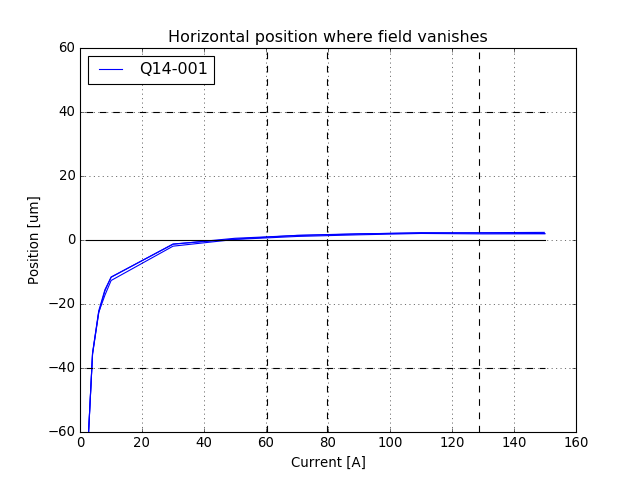

<IPython.core.display.Javascript object>


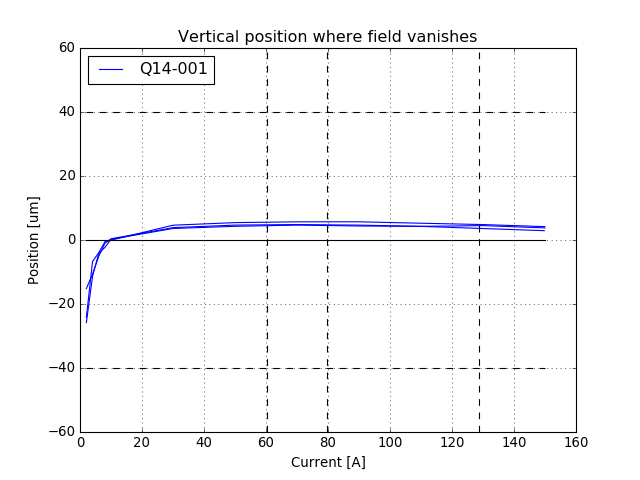

<IPython.core.display.Javascript object>


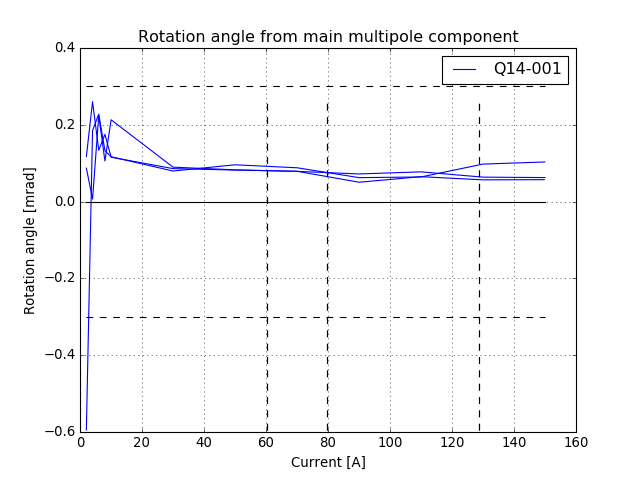

In [44]:
show_flag = True
marked_currents=[I_3gev_qda_avg,I_3gev_qdb1_avg,I_3gev_qdb2_avg]

# --- Magnetic center
rc.plot_magnetic_center(all_data, parms, mtype='normal', currents=marked_currents, show=show_flag, ylim=(-60,60))
rc.plot_magnetic_center(all_data, parms, mtype='skew',   currents=marked_currents, show=show_flag, ylim=(-60,60))

# --- Rotation Angle
rc.plot_rotation_angle(all_data, parms, currents=marked_currents, show=show_flag)

# # Table with Relative Multipoles

In [45]:
currents = [I_3gev_qda_avg,I_3gev_qdb1_avg,I_3gev_qdb2_avg]
currents = {'QDA':I_3gev_qda_avg, 'QDB1':I_3gev_qdb1_avg, 'QDB2':I_3gev_qdb2_avg}
for label,current in currents.items():
    print(label+':')
    print('='*(1+len(label)))
    rc.print_multipoles_single_magnet(all_data[0], parms, current, 0.5)
    print()

QDB1:
=====
h  :      (B_n/B_2)@r_0        |       (A_n/B_2)@r_0      
----------------------------------------------------------
01 : -1.302e-04 +/- 1.218e-05  |  -4.151e-04 +/- 4.207e-05
02 : +1.000e+00 +/- 0.000e+00  |  +7.212e-05 +/- 4.903e-06
03 : +2.971e-04 +/- 9.063e-06  |  +8.436e-04 +/- 2.842e-05
04 : +1.098e-04 +/- 2.600e-06  |  +6.181e-05 +/- 2.930e-06
05 : +1.623e-04 +/- 7.062e-06  |  +3.854e-05 +/- 6.372e-06
06 : -3.445e-04 +/- 3.112e-06  |  +2.403e-05 +/- 9.249e-06
07 : +1.042e-04 +/- 2.295e-06  |  -1.519e-05 +/- 6.398e-06
08 : +6.929e-05 +/- 3.701e-06  |  +1.010e-05 +/- 1.871e-06
09 : +6.366e-05 +/- 4.464e-06  |  -4.484e-05 +/- 4.407e-06
10 : +1.640e-03 +/- 1.201e-05  |  -4.587e-05 +/- 8.763e-06
11 : +7.461e-05 +/- 2.941e-07  |  -3.663e-05 +/- 7.994e-07
12 : +7.788e-05 +/- 6.040e-06  |  -2.763e-05 +/- 4.262e-06
13 : +7.107e-05 +/- 4.870e-06  |  -3.498e-05 +/- 1.794e-06
14 : -6.222e-04 +/- 1.429e-05  |  -4.429e-05 +/- 1.102e-05
15 : +6.035e-05 +/- 7.964e-06  |  -4.746e-05